# Data exploration

In [537]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
# helps to plot graphs in line with code-cells 
import seaborn as sns

### Importing the data


In [538]:
Purchasing_Power_Per_Capita_Data_url = 'https://raw.githubusercontent.com/Hardi-Lior/WDL/main/Stage_1/data/Purchasing_Power_Per_Capita_Data.csv'
Purchasing_Power_Per_Capita_Data_df = pd.read_csv(Purchasing_Power_Per_Capita_Data_url)

County_Coordinates_Data_url = 'https://raw.githubusercontent.com/Hardi-Lior/WDL/main/Stage_1/data/County_Coordinates_Data.csv'
County_Coordinates_Data_df = pd.read_csv(County_Coordinates_Data_url)

Individual_journeys_Data_url = 'https://raw.githubusercontent.com/Hardi-Lior/WDL/main/Stage_1/data/Individual_journeys.csv'
Individual_journeys_Data_df = pd.read_csv(Individual_journeys_Data_url,index_col=0)


Churn_OD_url = 'https://raw.githubusercontent.com/Hardi-Lior/WDL/main/Stage_1/data/Churn_OD.txt'
Churn_OD_Data_df = pd.read_csv(Churn_OD_url ,delimiter="|",encoding = 'Latin1')




In [539]:
Purchasing_Power_Per_Capita_Data_df.head()

,Territórios,year_2017
0,espinho,103.0
1,gondomar,84.1
2,maia,110.7
3,matosinhos,123.0
4,oliveira de azeméis,83.1


In [540]:
County_Coordinates_Data_df.head()

,address,location,point,latitude,longitude,altitude,County
0,"amadora,lisboa,Portugal","Amadora, Lisboa, Grande Lisboa, Área Metropoli...","(38.7595162, -9.223677009460125, 0.0)",38.759516,-9.223677,0.0,amadora
1,"cascais,lisboa,Portugal","Cascais, Lisboa, Grande Lisboa, Área Metropoli...","(38.72240025, -9.396909171649877, 0.0)",38.722400,-9.396909,0.0,cascais
2,"lisboa,lisboa,Portugal","Lisboa, Grande Lisboa, Área Metropolitana de L...","(38.7077507, -9.1365919, 0.0)",38.707751,-9.136592,0.0,lisboa
3,"loures,lisboa,Portugal","Loures, Lisboa, Grande Lisboa, Área Metropolit...","(38.8578642, -9.175816056948255, 0.0)",38.857864,-9.175816,0.0,loures
4,"mafra,lisboa,Portugal","Mafra, Lisboa, Grande Lisboa, Área Metropolita...","(38.9369782, -9.3282374, 0.0)",38.936978,-9.328237,0.0,mafra


In [541]:

Churn_OD_Data_df['County_of_Origin'] = Churn_OD_Data_df['County_of_Origin'].str.lower()
Churn_OD_Data_df['County_of_Public_Transportation'] = Churn_OD_Data_df['County_of_Public_Transportation'].str.lower()
Churn_OD_Data_df = Churn_OD_Data_df[['County_of_Origin','County_of_Public_Transportation','Demand_weight']]
Churn_OD_Data_df.head() 

,County_of_Origin,County_of_Public_Transportation,Demand_weight
0,amadora,lisboa,0.307323
1,amadora,lisboa,0.069997
2,amadora,lisboa,0.066059
3,amadora,lisboa,0.059847
4,amadora,lisboa,0.052341


In [542]:
Individual_journeys_Data_df['County_of_Origin'] = Individual_journeys_Data_df['County_of_Origin'].str.lower()
Individual_journeys_Data_df.head()

,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day,Avg_BusUsers_Daily_to_Lisboa,Avg_BusUsers_Daily_to_Loures,Avg_BusUsers_Daily_to_Oeiras,Avg_BusUsers_Daily_to_Almada,Avg_BusUsers_Daily_to_Amadora,Avg_BusUsers_Daily_to_Odivelas,Avg_BusUsers_Daily_to_Porto,Avg_BusUsers_Daily_to_Matosinhos,Avg_BusUsers_Daily_to_Vila nova de gaia,Avg_BusUsers_Daily_to_Gondomar,Avg_BusUsers_Daily_to_Maia,Avg_BusUsers_Daily_to_Valongo,Avg_BusUsers_Daily_to_Paredes,Avg_BusUsers_Daily_to_Santo tirso
0,alcochete,Sep-19 to Feb-20,Female,25-34,47.734735,47.247936,0.386890,0.057711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,alcochete,Sep-19 to Feb-20,Female,45-54,42.712664,42.277080,0.346186,0.051640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,alcochete,Sep-19 to Feb-20,Male,35-44,148.504551,146.990102,1.203629,0.179542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,alcochete,Sep-20 to Jan-21,Female,55-64,34.201745,33.852956,0.277205,0.041350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,alcochete,Sep-20 to Jan-21,Male,35-44,157.793211,156.184036,1.278914,0.190772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#1. Perlimenary Data formating 

##1.1 Purchasing Power Per Capita Data

In [543]:
# No missing data -> Fantastic
Purchasing_Power_Per_Capita_Data_df.isna().sum()

Territórios    0
year_2017      0
dtype: int64

In [544]:
Purchasing_Power_Per_Capita_Data_df.info()
County_Coordinates_Data_df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Territórios  32 non-null     object 
 1   year_2017    32 non-null     float64
dtypes: float64(1), object(1)
memory usage: 640.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   address    34 non-null     object 
 1   location   34 non-null     object 
 2   point      34 non-null     object 
 3   latitude   34 non-null     float64
 4   longitude  34 non-null     float64
 5   altitude   34 non-null     float64
 6   County     34 non-null     object 
dtypes: float64(3), object(4)
memory usage: 2.0+ KB


We can see that there are 33 rows, 33 counties in the data frame Purchasing_Power_Per_Capita_Data, but we can see that we have 34 counties in total from County_Coordinates_Data_df data frame

In [545]:
Purchasing_Power_Per_Capita_Data_set = set(Purchasing_Power_Per_Capita_Data_df['Territórios'])
County_Coordinates_Data_set = set(County_Coordinates_Data_df['County'])
difference_set = County_Coordinates_Data_set - Purchasing_Power_Per_Capita_Data_set
print(difference_set)

{'seixal', 'vila franca de xira'}


With furthe inspectin we can definitivly say that **seixal and vila franca de xira** are the two countires that wheren't included in the Purchasing_Power_Per_Capita_Data_set

In [546]:
# Exlude data from these counties form the data frame
filter1 = Churn_OD_Data_df['County_of_Origin']!='vila franca de xira'
filter2 = Churn_OD_Data_df['County_of_Origin']!='seixal'

filter3 = Churn_OD_Data_df['County_of_Public_Transportation']!='vila franca de xira'
filter4 = Churn_OD_Data_df['County_of_Public_Transportation']!='seixal'
# # Exclude data from second period that overalps from the covid lockdown 
# Period1, peritod2= Churn_OD_Data_df.Period.unique()
# filter3 = Churn_OD_Data_df['Period']==Period1

# applying the filter to the DataFrame
Churn_OD_Data_df = Churn_OD_Data_df.loc[filter1 & filter2 & filter3 & filter4, :]

We need to combine the Purchasing_Power_Per_Capita_Data and Churn_OD_Data_df 


In [547]:
# convering the Purchasing_Power_Per_Capita_Data to a dictory
Purchasing_Power_Per_Capita_dict = pd.Series(Purchasing_Power_Per_Capita_Data_df.year_2017.values,index=Purchasing_Power_Per_Capita_Data_df.Territórios).to_dict()

In [548]:
# Purchasing_Power_Per_Capita_dict

In [549]:
# getting that depature county coordinates and arrivel county coordinates for :
# County_of_Origin

Churn_OD_Data_df['County_of_Origin_Purchasing_Power_Per_Capita'] = Churn_OD_Data_df['County_of_Origin']
for idx, val in Churn_OD_Data_df['County_of_Origin'].iteritems():
    Churn_OD_Data_df.at[idx, 'County_of_Origin_Purchasing_Power_Per_Capita'] = Purchasing_Power_Per_Capita_dict[val]

# and 
# County_of_Public_Transportation
Churn_OD_Data_df['County_of_Dstination_Purchasing_Power_Per_Capita'] = Churn_OD_Data_df['County_of_Public_Transportation']
for idx, val in Churn_OD_Data_df['County_of_Public_Transportation'].iteritems():
    Churn_OD_Data_df.at[idx, 'County_of_Dstination_Purchasing_Power_Per_Capita'] = Purchasing_Power_Per_Capita_dict[val]


In [550]:
def f(x):
  x1 = x[3]
  x2 = x[4]
  x3 = (x2-x1)/x1
  return (x3)  
Churn_OD_Data_df['percent_dif_OD_PPPC'] = Churn_OD_Data_df.apply(f, axis=1) #passes a Series object, row-wise

In [551]:
Churn_OD_Data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2251
Data columns (total 6 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   County_of_Origin                                  2080 non-null   object 
 1   County_of_Public_Transportation                   2080 non-null   object 
 2   Demand_weight                                     2080 non-null   float64
 3   County_of_Origin_Purchasing_Power_Per_Capita      2080 non-null   object 
 4   County_of_Dstination_Purchasing_Power_Per_Capita  2080 non-null   object 
 5   percent_dif_OD_PPPC                               2080 non-null   float64
dtypes: float64(2), object(4)
memory usage: 193.8+ KB


##1.2 Individual journeys Data


In [552]:
# remove counties that arent included in the 
# Exlude data from these counties form the data frame
filter1 = Individual_journeys_Data_df['County_of_Origin']!='vila franca de xira'
filter2 = Individual_journeys_Data_df['County_of_Origin']!='seixal'

# applying the filter to the DataFrame
Individual_journeys_Data_df = Individual_journeys_Data_df.loc[filter1 & filter2 , :]


In [553]:
## just remaiming the columns names in the Individual_journeys_Data_df
columns_names = list( Individual_journeys_Data_df.columns)
# columns_names = [each_string.lower() for each_string in columns_names]

## columns_names
new_columns_names = list()
for name in columns_names:
  try:
      lol, new_name = name.split("Avg_BusUsers_Daily_to_")
      new_name = new_name.lower()
      new_columns_names.append(new_name)
  except ValueError:
    new_columns_names.append(name)
    pass
# new_columns_names = [each_string.lower() for each_string in new_columns_names]

Individual_journeys_Data_df.rename(
    columns={i:j for i,j in zip(columns_names,new_columns_names)}, inplace=True
)
Individual_journeys_Data_df.columns

Index(['County_of_Origin', 'Period', 'GenderDescription',
       'AgeClassDescription', 'Average_BusUsers_per_Day', 'lisboa', 'loures',
       'oeiras', 'almada', 'amadora', 'odivelas', 'porto', 'matosinhos',
       'vila nova de gaia', 'gondomar', 'maia', 'valongo', 'paredes',
       'santo tirso'],
      dtype='object')

In [554]:
columns_of_interest =  [ 'lisboa', 'loures','oeiras', 'almada', 'amadora', 
                        'odivelas', 'porto', 'matosinhos', 'vila nova de gaia', 
                        'gondomar', 'maia', 'valongo', 'paredes', 'santo tirso'
                        ]

###1.2.1

In [555]:
new_temp = pd.DataFrame()
PPPC_Individual_journeys_Data_df = pd.DataFrame()


In [556]:


for val in columns_of_interest:
  print(val)
  filter = Individual_journeys_Data_df[val] != 0 
  temp = Individual_journeys_Data_df.loc[filter, :]
  temp['County_of_Transportation'] = val
  # getting that depature county coordinates and arrivel county coordinates for :
  # County_of_Origin
  temp['County_of_Origin_Purchasing_Power_Per_Capita'] = temp['County_of_Origin']
  for idx, i in temp['County_of_Origin'].iteritems():
      temp.at[idx, 'County_of_Origin_Purchasing_Power_Per_Capita'] = Purchasing_Power_Per_Capita_dict[i]
  # # and 
  # # County_of_Public_Transportation
  temp['County_of_Transportation_Purchasing_Power_Per_Capita'] = temp['County_of_Origin']
  for idx, i in temp['County_of_Origin'].iteritems():
      temp.at[idx, 'County_of_Transportation_Purchasing_Power_Per_Capita'] = Purchasing_Power_Per_Capita_dict[val]
  # calculating the percent_dif_OD_PPPC
  def f(x):
    x1 = x[-2]
    x2 = x[-1]
    x3 = (x2-x1)/x1
    return (x3)  
  temp['percent_dif_OD_PPPC'] = temp.apply(f, axis=1) #passes a Series object, row-wise
  ## combining the tem in to a single data Frame  
  colums_to_keep = ['County_of_Origin','Period','GenderDescription',
                    'AgeClassDescription']
  new_temp[colums_to_keep] = temp[colums_to_keep]
  new_temp['Avg_BusUsers_Daily_County_of_Transportation']  = temp[val] 
  colums_to_keep_2 =['County_of_Transportation',
                     'County_of_Origin_Purchasing_Power_Per_Capita',
                     'County_of_Transportation_Purchasing_Power_Per_Capita', 
                     'percent_dif_OD_PPPC']
  new_temp[colums_to_keep_2] = temp [colums_to_keep_2]
  colums_to_keep_3 = ['County_of_Origin','Period','GenderDescription',
                      'AgeClassDescription',
                      'Avg_BusUsers_Daily_County_of_Transportation',
                      'County_of_Transportation',
                      'County_of_Origin_Purchasing_Power_Per_Capita',
                      'County_of_Transportation_Purchasing_Power_Per_Capita',
                      'percent_dif_OD_PPPC']
  new_temp[colums_to_keep_3] = new_temp [colums_to_keep_3]
  # creating new data frame
  PPPC_Individual_journeys_Data_df = PPPC_Individual_journeys_Data_df.append(new_temp)




lisboa
loures
oeiras
almada
amadora
odivelas
porto


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

matosinhos
vila nova de gaia
gondomar
maia
valongo
paredes
santo tirso


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

###1.2.2 temp

In [557]:
PPPC_Individual_journeys_Data_df.columns
PPPC_Individual_journeys_Data_df.sort_values('County_of_Origin')
PPPC_Individual_journeys_Data_df.reset_index(drop=True)

,County_of_Origin,Period,GenderDescription,AgeClassDescription,Avg_BusUsers_Daily_County_of_Transportation,County_of_Transportation,County_of_Origin_Purchasing_Power_Per_Capita,County_of_Transportation_Purchasing_Power_Per_Capita,percent_dif_OD_PPPC
0,alcochete,Sep-19 to Feb-20,Female,25-34,47.247936,lisboa,118.8,219.6,0.848485
1,alcochete,Sep-19 to Feb-20,Female,45-54,42.277080,lisboa,118.8,219.6,0.848485
2,alcochete,Sep-19 to Feb-20,Male,35-44,146.990102,lisboa,118.8,219.6,0.848485
3,alcochete,Sep-20 to Jan-21,Female,55-64,33.852956,lisboa,118.8,219.6,0.848485
4,alcochete,Sep-20 to Jan-21,Male,35-44,156.184036,lisboa,118.8,219.6,0.848485
...,...,...,...,...,...,...,...,...,...
6967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [558]:
PPPC_Individual_journeys_Data_df = PPPC_Individual_journeys_Data_df.dropna(subset=['County_of_Origin'])

In [559]:
PPPC_Individual_journeys_Data_df.head()

,County_of_Origin,Period,GenderDescription,AgeClassDescription,Avg_BusUsers_Daily_County_of_Transportation,County_of_Transportation,County_of_Origin_Purchasing_Power_Per_Capita,County_of_Transportation_Purchasing_Power_Per_Capita,percent_dif_OD_PPPC
0,alcochete,Sep-19 to Feb-20,Female,25-34,47.247936,lisboa,118.8,219.6,0.848485
1,alcochete,Sep-19 to Feb-20,Female,45-54,42.277080,lisboa,118.8,219.6,0.848485
2,alcochete,Sep-19 to Feb-20,Male,35-44,146.990102,lisboa,118.8,219.6,0.848485
3,alcochete,Sep-20 to Jan-21,Female,55-64,33.852956,lisboa,118.8,219.6,0.848485
4,alcochete,Sep-20 to Jan-21,Male,35-44,156.184036,lisboa,118.8,219.6,0.848485


#2.Visualisation 

##2.1

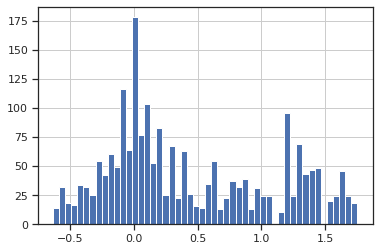

In [560]:
Churn_OD_Data_df['percent_dif_OD_PPPC'].hist(bins=50)

the data is skewed right this mean :
- people tend to move arround in same city ?? there is alot to move ment with in lisboa and porto or people traveling within a county 
- more people travel to counties with higher purchesing power 
- some tendo travel to 


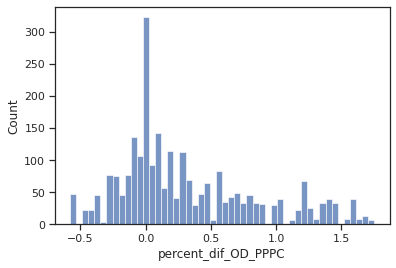

In [563]:

fig.suptitle('Histplots of Bus Users Per Day')
sns.histplot(PPPC_Individual_journeys_Data_df['percent_dif_OD_PPPC'],bins=50)
#, ax=axs[0])
# set(title='Histplot of Average Bus Users Per Day')

In [562]:
def displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, 
            weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, 
            legend=True, palette=None, hue_order=None, hue_norm=None, color=None, 
            col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, 
            facet_kws=None, **kwargs)



SyntaxError: ignored

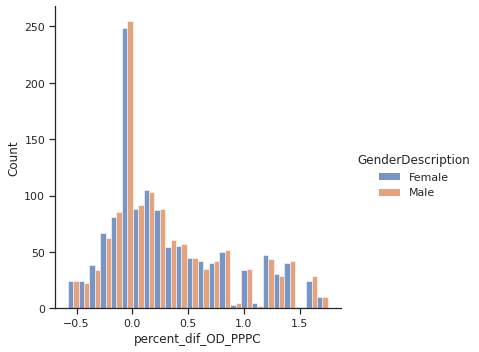

In [564]:
# plt.figure(figsize=(9,6))
sns.displot(PPPC_Individual_journeys_Data_df, x="percent_dif_OD_PPPC",kde=False,
            hue="GenderDescription",multiple="dodge")
# ,hist_kws={'log':True}

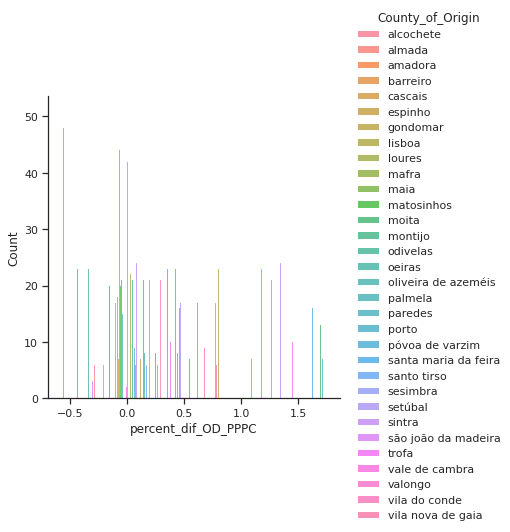

In [565]:

sns.displot(PPPC_Individual_journeys_Data_df, x="percent_dif_OD_PPPC", 
            hue="County_of_Origin",multiple="dodge")
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

<Figure size 648x432 with 0 Axes>

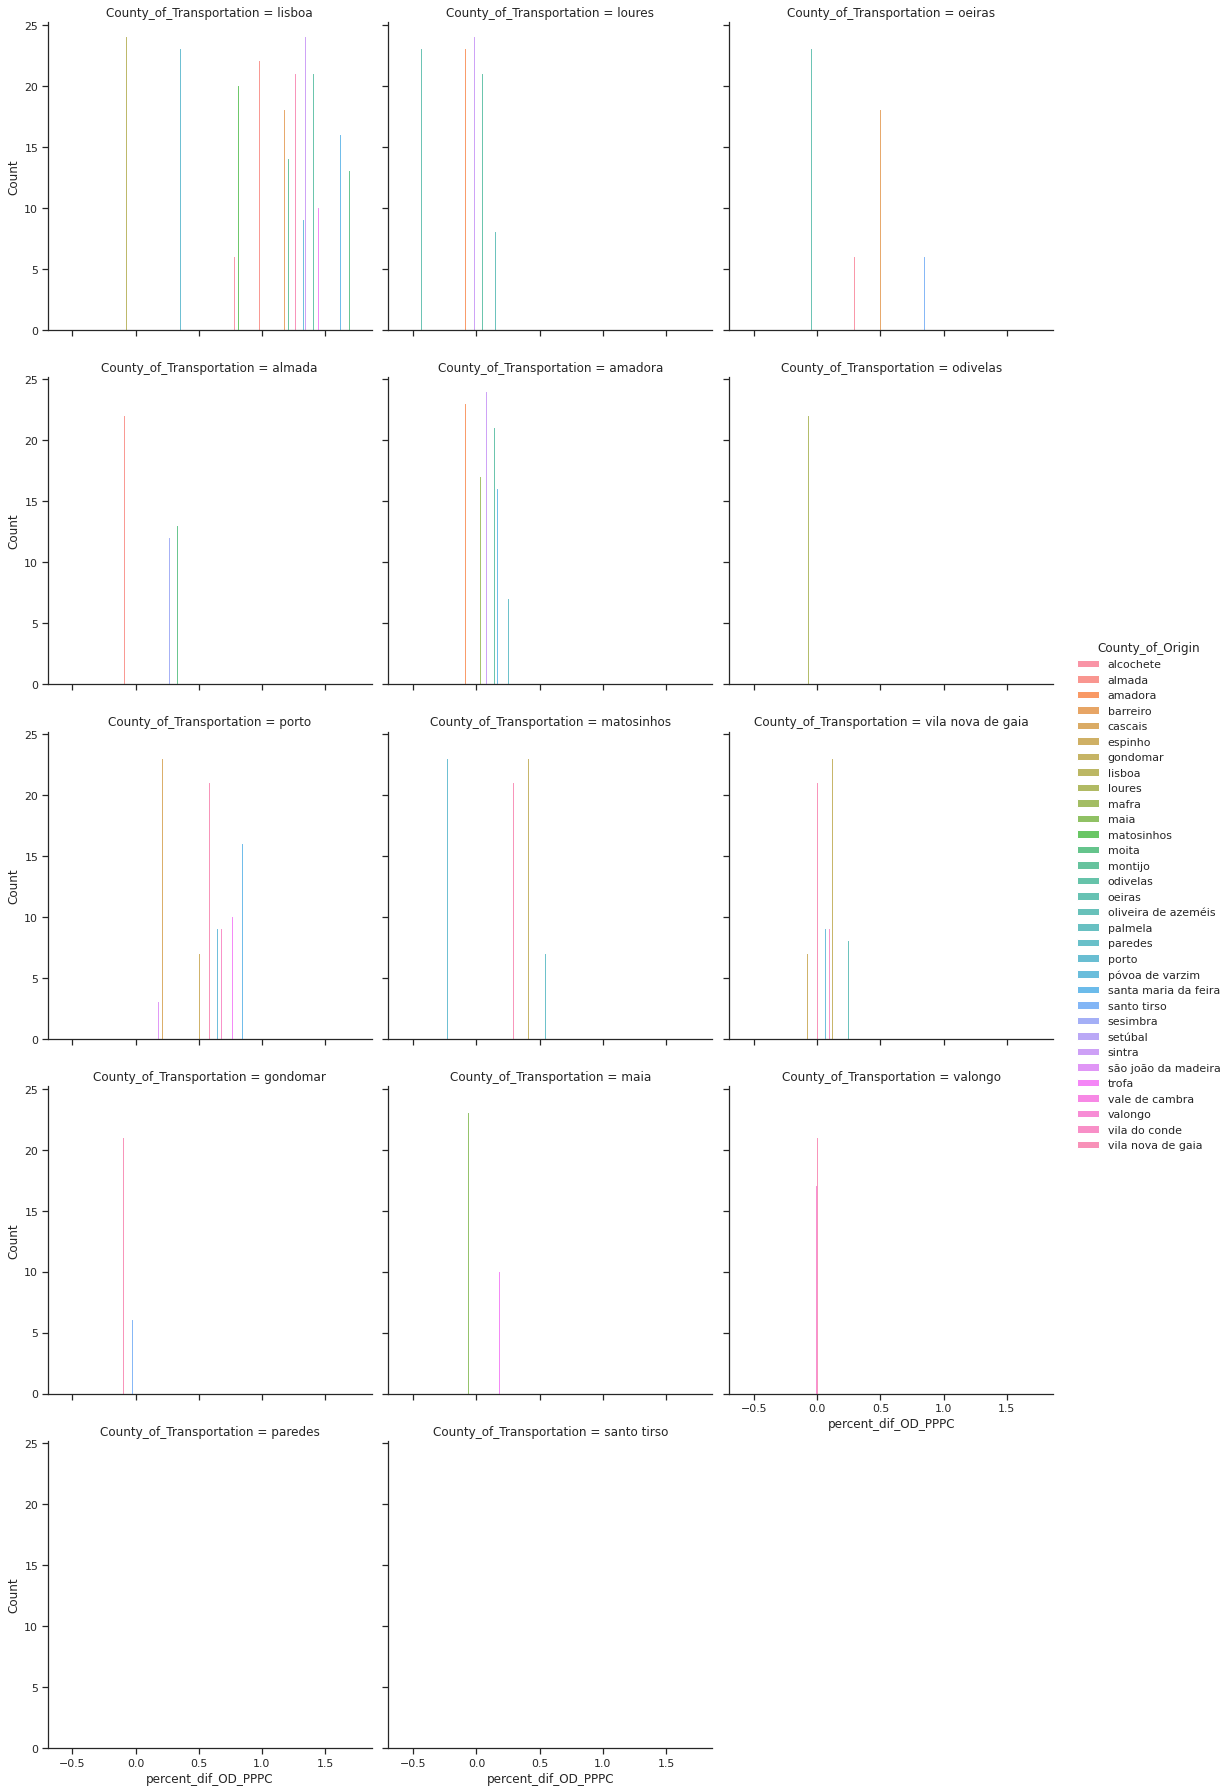

In [566]:
plt.figure(figsize=(9,6))
sns.displot(PPPC_Individual_journeys_Data_df,
            x="percent_dif_OD_PPPC", 
            hue="County_of_Origin",
            col="County_of_Transportation",
            col_wrap=3,multiple="dodge")
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

<Figure size 648x432 with 0 Axes>

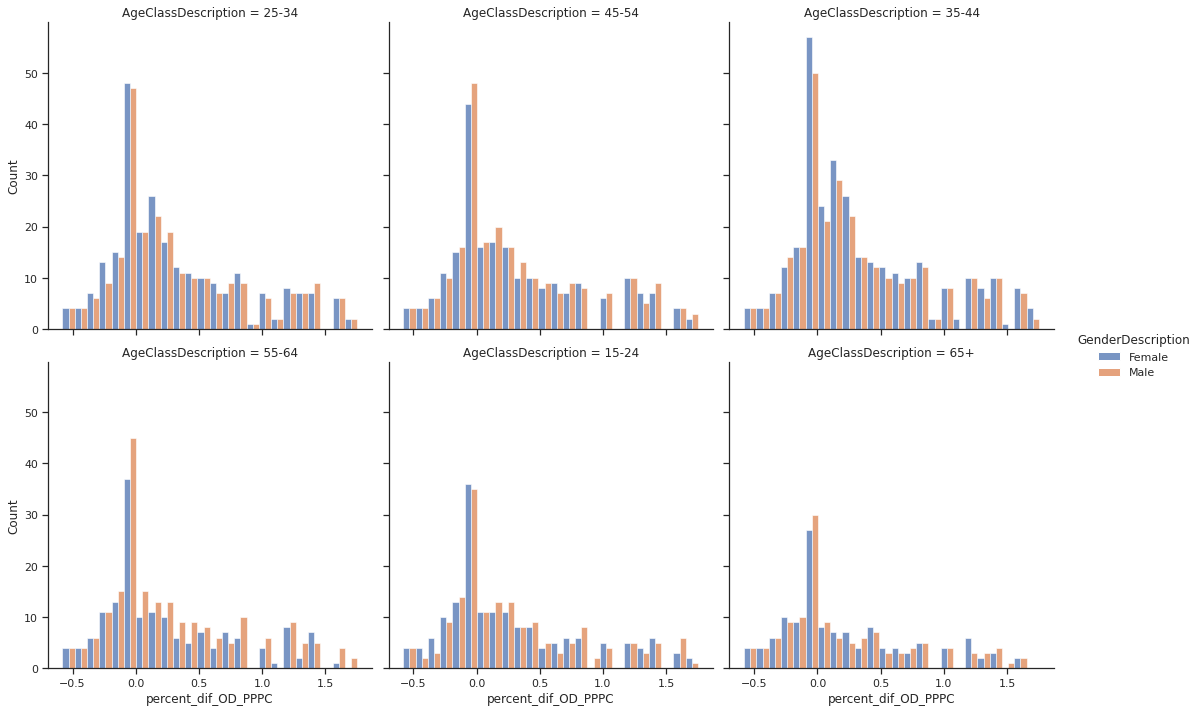

In [567]:
sns.displot(PPPC_Individual_journeys_Data_df,
            x="percent_dif_OD_PPPC", 
            hue="GenderDescription",
            col="AgeClassDescription",
            col_wrap=3,
            multiple="dodge") #log_scale = True


## 2.2

#3.Conclusion

##3.1